<a href="https://colab.research.google.com/github/ismael-almazan/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Practica21_263177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Autonoma de Ciudad Juarez

Maestría en Inteligencia Artificial y Analítica de Datos

Programación para Analítica Descriptiva y Predictiva

Ismael Almazan Luna

18 de octubre de 2025

***PARA PODER VISUALIZAR Y COMPARAR COMO AFECTA CADA METODO DE NORMALIZACION PARA EL EJERCICIO 1 Y 2 UTILIZARE LA MISMA CARACTERISITCA Y PARA EL 3, 4 Y 5 LOS MISMOS DATOS ALEATORIOS SOBRE LOS CUALES SE NORMALIZARA CON DISTINTO METODO***

# Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?

*Solamente afecto la escala o rango de los valores, sin embargo no afecto la distribucion o la forma de ellos.*

2. ¿Qué interpretas del p-valor antes y después de la normalización?

*Antes y depues de la normalizacion el p-value es menor que 0.05, con lo cual se rechaza la hipotesis nula de prueba de Shapiro, por lo tanto los datos no se aproximan antes ni despues de la normalizacion a una distribucion normal*


Datos originales
Estadístico W = 0.9839
p-valor = 0.0387

Datos Normalizados
Estadístico W = 0.9839
p-valor = 0.0387


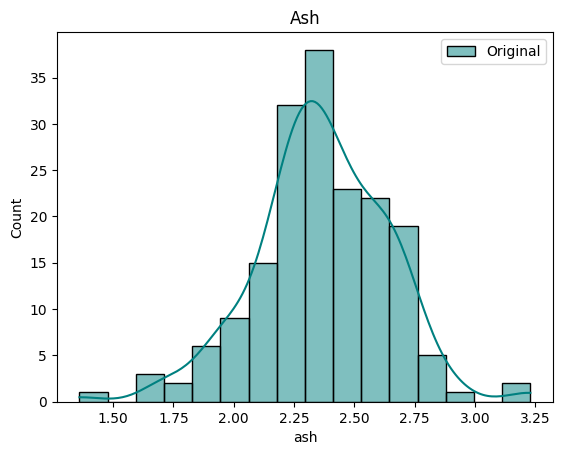

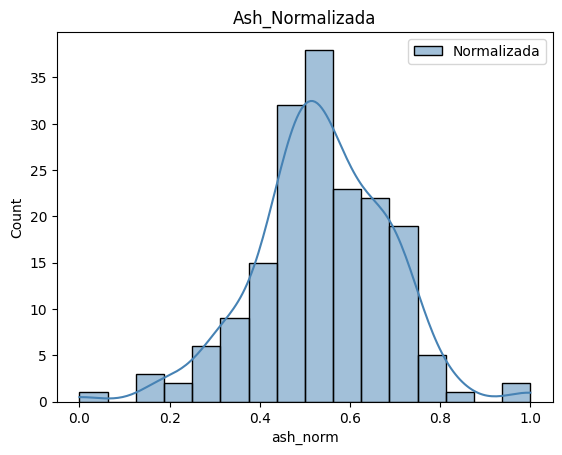

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from scipy import stats

#Importar el wine de sklearn
df1=load_wine()
df1=pd.DataFrame(df1.data,columns=df1.feature_names)
df1.head()

#Prueba de normalidad shapiro de la caracteristica ash
print("Datos originales")
statistic, p_value = stats.shapiro(df1['ash'])
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

#Aplicar normalizacion  min-max a ash
df1['ash_norm'] = (df1['ash'] - df1['ash'].min()) / (df1['ash'].max() - df1['ash'].min())

#Prueba de normalidad shapiro de la caracteristica ash normalizada
print("\nDatos Normalizados")
statistic, p_value = stats.shapiro(df1['ash_norm'])
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

#Graficos de histograma

sns.histplot(df1['ash'], label='Original', color='teal',kde=True)
plt.title('Ash')
plt.legend()
plt.show()

sns.histplot(df1['ash_norm'], label='Normalizada', color='steelblue',kde=True)
plt.title('Ash_Normalizada')
plt.legend()
plt.show()

 # Ejercicio 2: Normalización Z-Score

Instrucciones:

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:

1.	¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?

*AL igual que la normalizacion minmax, solamente cambia el rango o escala de los datos y ademas centrando la media en cero y al centro, pero sin afectar la forma en que se distribuyen, ademas no afecta el resultado de la prueba de normalidad, sigue siguiendo no normal*

2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?

*La implicacion mas significativa es que centra y transforma los datos para que tengan media de cero y desviacion estandar de uno, lo cual facilita el uso para cierto modelos*

Datos originales
Estadístico W = 0.9839
p-valor = 0.0387

Datos Normalizados
Estadístico W = 0.9839
p-valor = 0.0387


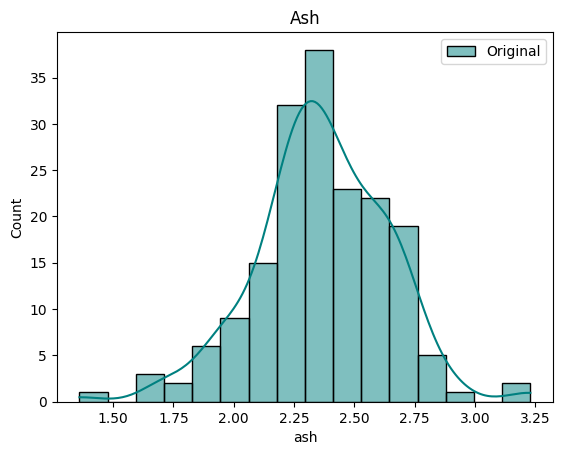

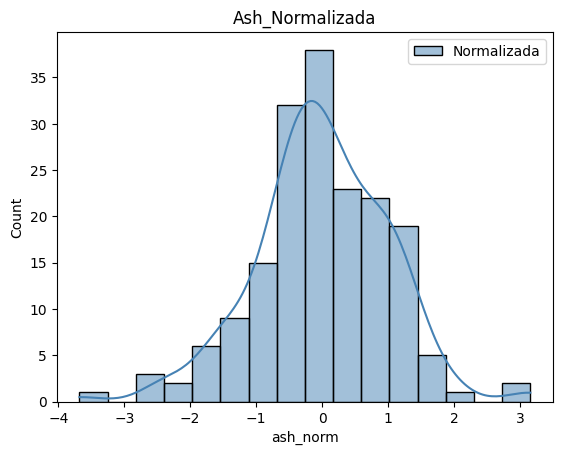

In [2]:
#Importar el wine de sklearn
df2=load_wine()
df2=pd.DataFrame(df2.data,columns=df2.feature_names)
df2.head()

#Prueba de normalidad shapiro de la caracteristica ash
statistic, p_value = stats.shapiro(df2['ash'])
print("Datos originales")
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

#Aplicar normalizacion  Z-score
df2['ash_norm'] = stats.zscore(df2['ash'])

#Prueba de normalidad shapiro de la caracteristica ash normalizada
statistic, p_value = stats.shapiro(df2['ash_norm'])
print("\nDatos Normalizados")
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

#Graficos de histograma

sns.histplot(df2['ash'], label='Original', color='teal',kde=True)
plt.title('Ash')
plt.legend()
plt.show()

sns.histplot(df2['ash_norm'], label='Normalizada', color='steelblue',kde=True)
plt.title('Ash_Normalizada')
plt.legend()
plt.show()

# Ejercicio 3: Transformación Logarítmica

Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

1.	¿Cómo afectó la transformación

*logarítmica a la distribución de los datos?
La transformacion comprimio los valores, especialmente los valores mas grandes, haciendo que los datos sean mas simetricos y cercanos  la normalidad al suvizarlos y mejorar la varianza.*

2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?

*Mejoro el estadistico W de normanlidad, sin embargo el p-value aunque incremento, los datos siguien sin aproximarse a una distribucion normal, se sigue recahazando la Ho de normalidad.*



Datos originales
Estadístico W = 0.9446
p-valor = 0.0000
Datos transformados
Estadístico W = 0.8523
p-valor = 0.0000


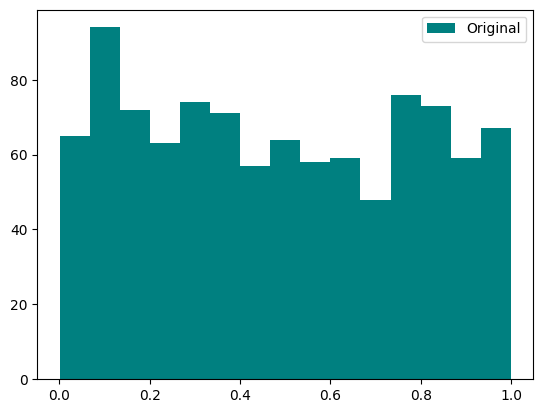

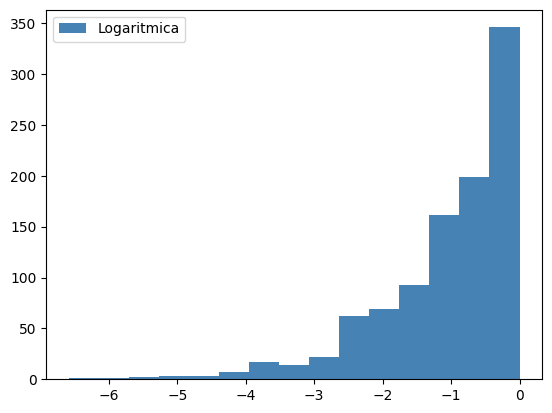

In [3]:
#Mil datos aleatorios asegurando que aprox la mitad sean positivos
datos = np.random.rand(1000)

#Transformacion logaritmica
datoslog=np.log(datos)

#Prueba de normalidad shapiroa
print("Datos originales")
statistic, p_value = stats.shapiro(datos)
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

print("Datos transformados")
statistic, p_value = stats.shapiro(datoslog)
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

#Graficar
plt.hist(datos, bins=15, label='Original',color='teal')
plt.legend()
plt.show()

plt.hist(datoslog, bins=15, label='Logaritmica',color='steelblue')
plt.legend()
plt.show()

# Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

1.	¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?

*Lo valores al igual que en el anterior metodo se comprimer, y los datos tienden a desplazarce hacia la derecha, concentrandoce en valores altos.*

2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?

*COmo los datos estan entre 0 y 1, los valores pequenos aumentan, los cecanos a  mientran que los grandes se mantienen similares al aplicar la raiz cuadrada.*

Datos originales
Estadístico W = 0.9446
p-valor = 0.0000
Datos transformados
Estadístico W = 0.9482
p-valor = 0.0000


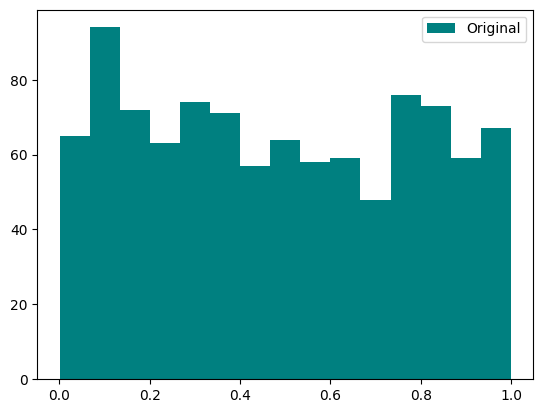

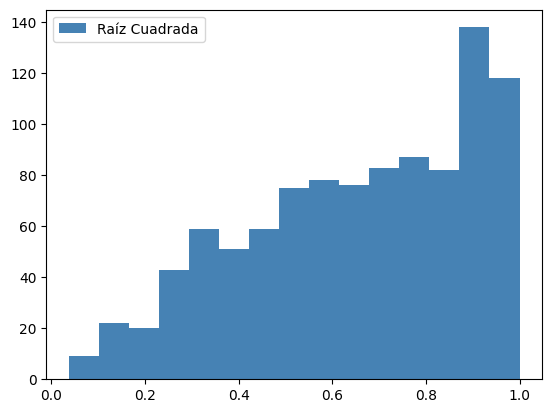

In [4]:
#Datos aleatorios con numpy

#Transformacion raiz cuadrada
datosraiz = np.sqrt(datos)

#Prueba de normalidad shapiro
print("Datos originales")
statistic, p_value = stats.shapiro(datos)
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

print("Datos transformados")
statistic, p_value = stats.shapiro(datosraiz)
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

#Graficar
plt.hist(datos, bins=15, label='Original',color='teal')
plt.legend()
plt.show()

plt.hist(datosraiz, bins=15, label='Raíz Cuadrada',color='steelblue')
plt.legend()
plt.show()

# Ejercicio 5: Transformación Box-Cox
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

1.	¿Cómo afectó la transformación Box-Cox a la distribución de los datos?

*Ajusto la escala reduciendo la variabilidad, y aproximandolos mas a una distribucion normal.*

2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?

*Indica que tipo de trandormacion es mas adecuada para normalizar los datos, el valor de lambda fue de 0.6956, lo que indaica que los datos ya estaban aproximados a una distribucion normal, por lo que solo se ajusta la simetria y la diferecnias de varriaza,*


Valor lambda (λ): 0.6395
Datos originales
Estadístico W = 0.9446
p-valor = 0.0000
Datos transformados
Estadístico W = 0.9524
p-valor = 0.0000


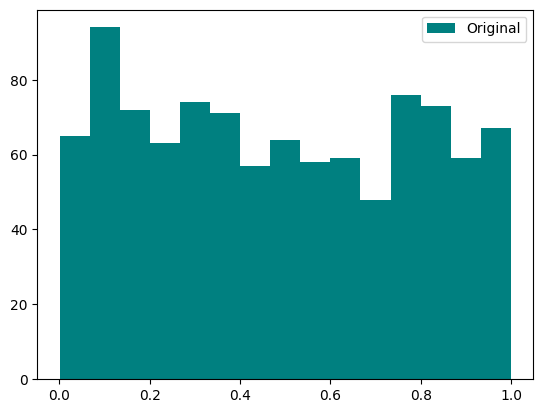

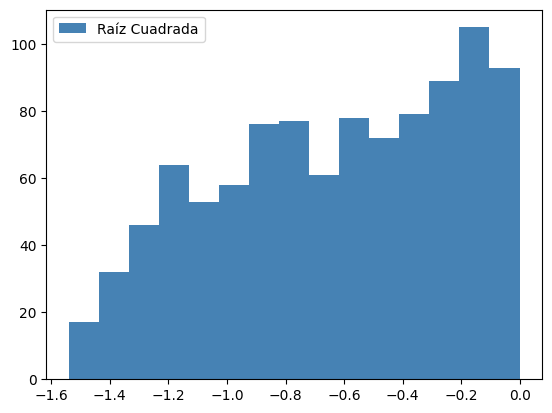

In [5]:
#Datos aleatorios con numpy


datosboxcox, lmbda = stats.boxcox(datos)
print(f"Valor lambda (λ): {lmbda:.4f}")

#Prueba de normalidad shapiro
print("Datos originales")
statistic, p_value = stats.shapiro(datos)
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

print("Datos transformados")
statistic, p_value = stats.shapiro(datosboxcox)
print("Estadístico W =", f"{statistic:.4f}")
print("p-valor =", f"{p_value:.4f}")

#Graficar
plt.hist(datos, bins=15, label='Original',color='teal')
plt.legend()
plt.show()

plt.hist(datosboxcox, bins=15, label='Raíz Cuadrada',color='steelblue')
plt.legend()
plt.show()

# Comparacion grafica de los metodos de normalizacion

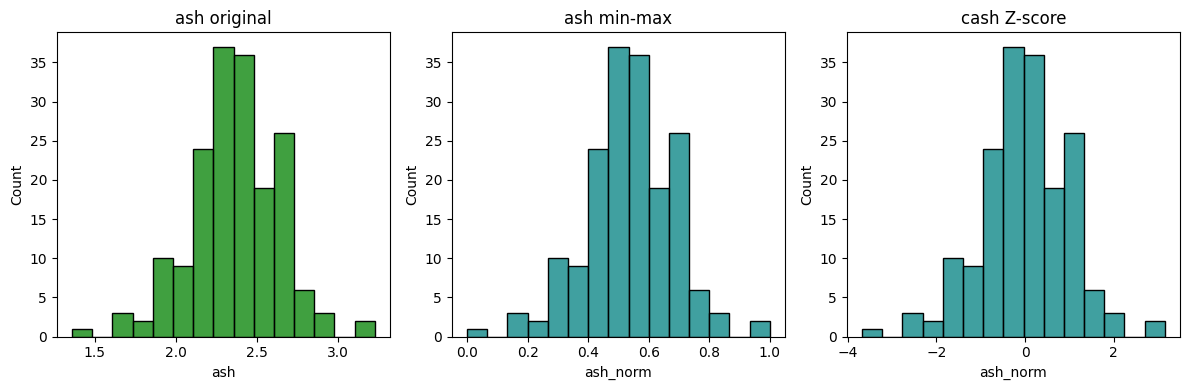

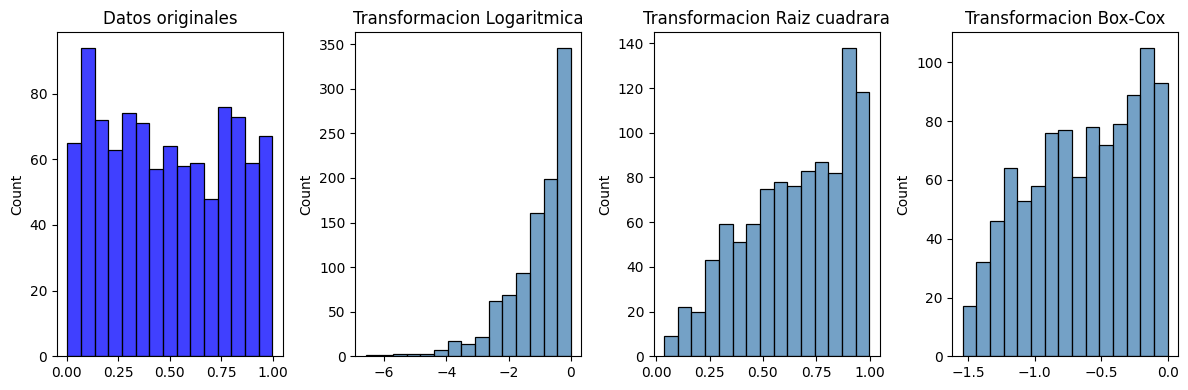

In [11]:

# Crear figura y ejes 1x3
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

# Cada histograma por separado usando un solo índice
sns.histplot(df1['ash'], ax=axes[0], kde=False, color='green', bins=15)
axes[0].set_title('ash original')

sns.histplot(df1['ash_norm'], ax=axes[1], kde=False, color='teal', bins=15)
axes[1].set_title('ash min-max')

sns.histplot(df2['ash_norm'], ax=axes[2], kde=False, color='teal', bins=15)
axes[2].set_title('cash Z-score')

plt.tight_layout()
plt.show()


fig2, axes2 = plt.subplots(1, 4, figsize=(12, 4))

sns.histplot(datos, ax=axes2[0], kde=False, color='blue', bins=15)
axes2[0].set_title('Datos originales')

sns.histplot(datoslog, ax=axes2[1], kde=False, color='steelblue', bins=15)
axes2[1].set_title('Transformacion Logaritmica')

sns.histplot(datosraiz, ax=axes2[2], kde=False, color='steelblue', bins=15)
axes2[2].set_title('Transformacion Raiz cuadrara')

sns.histplot(datosboxcox, ax=axes2[3], kde=False, color='steelblue', bins=15)
axes2[3].set_title('Transformacion Box-Cox')

plt.tight_layout()
plt.show()
